In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# HR_management data
"In this project, I'll visualize data to help readers gain clearer insights."  

In [2]:
df_hr = pd.read_csv('dateset/HR_Data.csv', header=0)  
df_hr.head()
# df_hr.dtypes 

Attrition    Business Travel CF_age band CF_attrition label Department  \
0       Yes      Travel_Rarely     35 - 44       Ex-Employees      Sales   
1        No  Travel_Frequently     45 - 54  Current Employees        R&D   
2       Yes      Travel_Rarely     35 - 44       Ex-Employees        R&D   
3        No  Travel_Frequently     25 - 34  Current Employees        R&D   
4        No      Travel_Rarely     25 - 34  Current Employees        R&D   

  Education Field   emp no  Employee Number  Gender               Job Role  \
0   Life Sciences  STAFF-1                1  Female        Sales Executive   
1   Life Sciences  STAFF-2                2    Male     Research Scientist   
2           Other  STAFF-4                4    Male  Laboratory Technician   
3   Life Sciences  STAFF-5                5  Female     Research Scientist   
4         Medical  STAFF-7                7    Male  Laboratory Technician   

   ... Performance Rating Relationship Satisfaction Standard Hours  \
0  ...                  3                         1             80   
1  ...                  4                         4             80   
2  ...                  3                         2             80   
3  ...                  3                         3             80   
4  ...                  3                         4             80   

   Stock Option Level  Total Working Years  Work Life Balance  \
0                   0                    8                  1   
1                   1                   10                  3   
2                   0                    7                  3   
3                   0                    8                  3   
4                   1                    6                  3   

   Years At Company  Years In Current Role  Years Since Last Promotion  \
0                 6                      4                           0   
1                10                      7                           1   
2                 0                      0                           0   
3                 8                      7                           3   
4                 2                      2                           2   

   Years With Curr Manager  
0                        5  
1                        7  
2                        0  
3                        0  
4                        2  

[5 rows x 41 columns]

# Frame info :
### 1470 rows x 41 columns

In [3]:
num_rows, num_columns = df_hr.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns) 

Number of rows: 1470
Number of columns: 41


# Count Active emplooyee

 Number of no 1233


Attrition  number
0       Yes    1233
1        No     237

Employee rate : 		83.88 


Text(0.5, 1.0, 'Employee Status Overview: Active vs. Inactive')

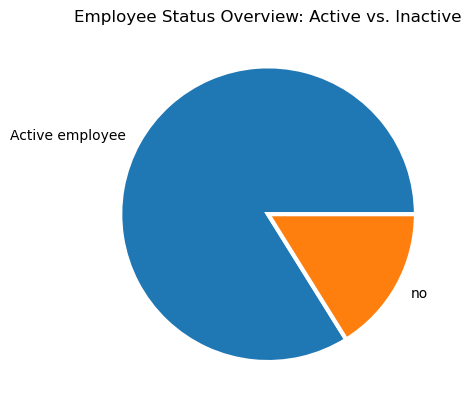

In [4]:
unique_attrition = df_hr['Attrition'].drop_duplicates()

def count_row(row) :
    count = 0 
    # for value in row  :
    if row == 'No' :
        count = 1      
        # else :
        #     count = 0             
    return count
    # return row[row=='No'].count()
    
df_hr['active'] = df_hr['Attrition'].apply(lambda row : count_row(row))

print(f" Number of no {df_hr['active'].sum()}")
active = df_hr['active'].sum()
# print(unique_attrition) 

attrition = pd.DataFrame(unique_attrition)  
attrition['number'] =  [ active ,   num_rows - active ]
display(attrition )
percenk = (active / num_rows) * 100 
print(f"Employee rate : \t\t{round(percenk , 2)} ")
 
plt.pie(attrition['number'], labels=['Active employee' , 'no'], wedgeprops={'edgecolor': 'white','linewidth':3})
plt.title('Employee Status Overview: Active vs. Inactive')



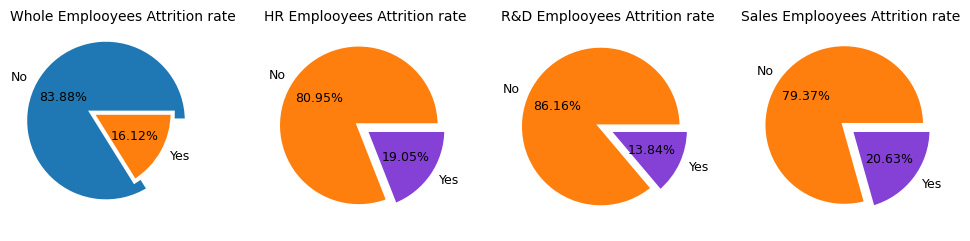

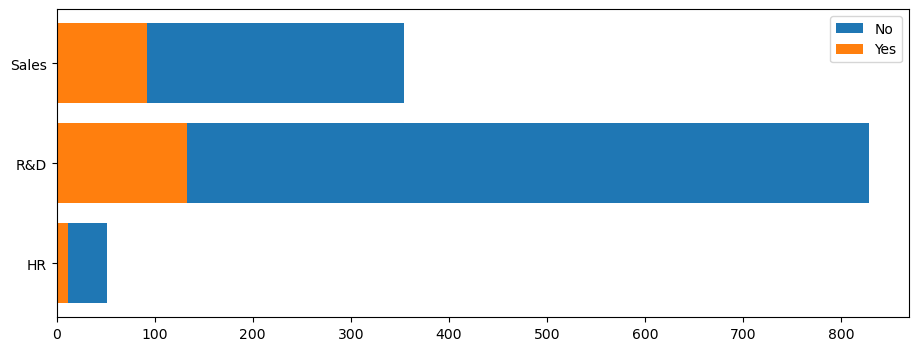

In [5]:
fig, ax = plt.subplots(1, 4 , figsize=(12,4)) 
wedgepie = {'edgecolor': 'white','linewidth':3}

font_pie = {'fontsize': 9 } 
# wedgepie  = {'edgecolor': 'white','linewidth':3}

attrition = pd.DataFrame(df_hr['Attrition'].value_counts()).reset_index()

attrition['base'] = attrition['count'].sum() 
attrition['rate'] = attrition['count'] / attrition['base']  
attrition['rate_x'] = attrition['count'] / attrition['base'] - 0.6
attrition['rank'] = attrition['count'].rank(ascending=True)
attrition['xplod'] = attrition['rank'] / attrition['count']
# display(attrition )

tb_attrition = df_hr.pivot_table(index='Attrition' , values='emp no' , columns='Department' , aggfunc='count' ).reset_index()
# display(tb_attrition) 


ax[0].pie( attrition['count'] , labels= attrition['Attrition']  , wedgeprops=wedgepie , autopct="%1.2f%%" , explode=attrition['rate_x'] , textprops=font_pie)
ax[0].set_title('Whole Emplooyees Attrition rate' , fontsize=10) 

color_pie = ['#ff7f0e' , '#8540d5']
ax[1].pie( tb_attrition['HR'] , labels=tb_attrition['Attrition']  ,  colors=color_pie, wedgeprops=wedgepie , autopct="%1.2f%%", explode=(0.1, 0) , textprops=font_pie)
ax[1].set_title('HR Emplooyees Attrition rate' ,  fontsize=10)   
color_pie = ['#ff7f0e' , '#8540d5']
ax[2].pie( tb_attrition['R&D'] , labels=tb_attrition['Attrition']  ,  colors=color_pie, wedgeprops=wedgepie , autopct="%1.2f%%", explode=(0.1, 0) , textprops=font_pie)
ax[2].set_title('R&D Emplooyees Attrition rate' ,  fontsize=10)   
color_pie = ['#ff7f0e' , '#8540d5']
ax[3].pie( tb_attrition['Sales'] , labels=tb_attrition['Attrition']  ,  colors=color_pie, wedgeprops=wedgepie , autopct="%1.2f%%", explode=(0.1, 0) , textprops=font_pie)
ax[3].set_title('Sales Emplooyees Attrition rate' ,  fontsize=10)   

fig, ax = plt.subplots(1, 1, figsize=(11, 4))

tb_attrition_rev = df_hr.pivot_table(index='Department' , values='emp no' , columns='Attrition' , aggfunc='count' ).reset_index()
# display(tb_attrition) 

plt.barh(tb_attrition_rev['Department'] , tb_attrition_rev['No'] , label='No')
plt.barh(tb_attrition_rev['Department'] , tb_attrition_rev['Yes'] , label='Yes')
ax.legend(loc='upper right') 


In [6]:
# FILTER BY attrition NO 
filter_no = df_hr.query("Attrition == 'No'" )  
filter_no 

Attrition    Business Travel CF_age band CF_attrition label Department  \
1           No  Travel_Frequently     45 - 54  Current Employees        R&D   
3           No  Travel_Frequently     25 - 34  Current Employees        R&D   
4           No      Travel_Rarely     25 - 34  Current Employees        R&D   
5           No  Travel_Frequently     25 - 34  Current Employees        R&D   
6           No      Travel_Rarely     Over 55  Current Employees        R&D   
...        ...                ...         ...                ...        ...   
1395        No      Travel_Rarely     35 - 44  Current Employees         HR   
1396        No      Travel_Rarely     25 - 34  Current Employees        R&D   
1397        No      Travel_Rarely     35 - 44  Current Employees        R&D   
1398        No      Travel_Rarely     25 - 34  Current Employees      Sales   
1399        No      Travel_Rarely     35 - 44  Current Employees      Sales   

       Education Field      emp no  Employee Number  Gender  \
1        Life Sciences     STAFF-2                2    Male   
3        Life Sciences     STAFF-5                5  Female   
4              Medical     STAFF-7                7    Male   
5        Life Sciences     STAFF-8                8    Male   
6              Medical    STAFF-10               10  Female   
...                ...         ...              ...     ...   
1395           Medical  STAFF-1550             1550    Male   
1396     Life Sciences  STAFF-2064             2064    Male   
1397           Medical  STAFF-1885             1885    Male   
1398  Technical Degree  STAFF-1541             1541    Male   
1399     Life Sciences  STAFF-1556             1556    Male   

                    Job Role  ... Relationship Satisfaction Standard Hours  \
1         Research Scientist  ...                         4             80   
3         Research Scientist  ...                         3             80   
4      Laboratory Technician  ...                         4             80   
5      Laboratory Technician  ...                         3             80   
6      Laboratory Technician  ...                         1             80   
...                      ...  ...                       ...            ...   
1395                 Manager  ...                         4             80   
1396  Manufacturing Director  ...                         2             80   
1397      Research Scientist  ...                         3             80   
1398    Sales Representative  ...                         2             80   
1399    Sales Representative  ...                         4             80   

     Stock Option Level  Total Working Years  Work Life Balance  \
1                     1                   10                  3   
3                     0                    8                  3   
4                     1                    6                  3   
5                     0                    8                  2   
6                     3                   12                  2   
...                 ...                  ...                ...   
1395                  0                   21                  3   
1396                  1                    6                  3   
1397                  1                   16                  3   
1398                  1                   12                  3   
1399                  0                    7                  2   

      Years At Company  Years In Current Role  Years Since Last Promotion  \
1                   10                      7                           1   
3                    8                      7                           3   
4                    2                      2                           2   
5                    7                      7                           3   
6                    1                      0                           0   
...                ...                    ...                         ...   
1395              

Text(0.5, 1.0, 'Job Level by Deparment')

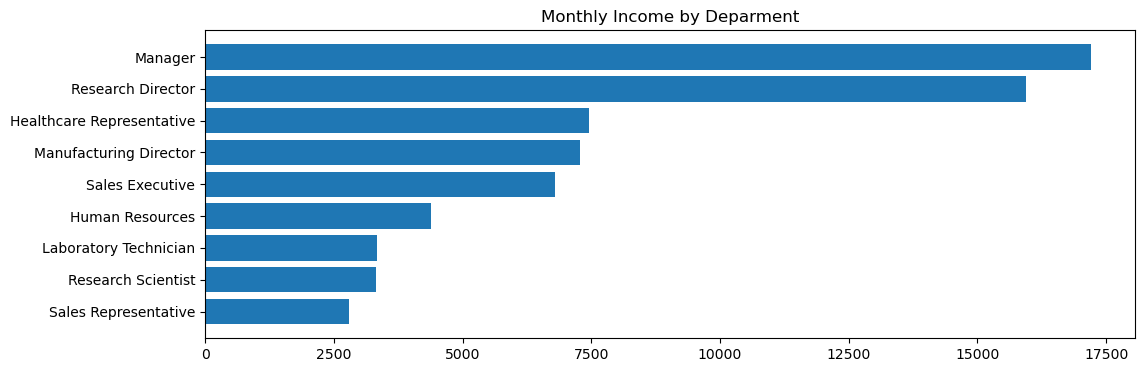

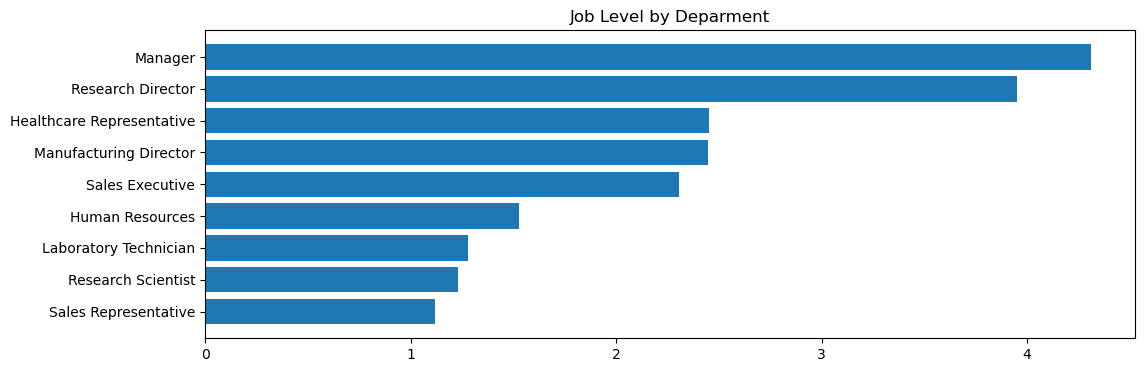

In [7]:

fig, ax = plt.subplots(1, 1 , figsize=(12,4)) 

job_role = filter_no.pivot_table(index='Job Role' , values=['Monthly Income' , 'Job Level']  ,  aggfunc='mean' ).reset_index()
job_role_income = job_role.sort_values(by='Monthly Income' , ascending=True)
# display(job_role_income)
ax.barh(job_role_income['Job Role'] , job_role_income['Monthly Income'])  
ax.set_title('Monthly Income by Deparment') 

fig, ax = plt.subplots(1, 1 , figsize=(12,4)) 
ax.barh(job_role_income['Job Role'] , job_role_income['Job Level'])  
ax.set_title('Job Level by Deparment') 
# ax.barh(job_role['Job Role'] , job_role['Job Level'])  
# ax.barh()
# ax[0].tick_params(axis='x', which='both', labelrotation=45)
# ax[1].tick_params(axis='x', which='both', labelrotation=45)
# ax[]


In [19]:
filter_no.head()

Attrition    Business Travel CF_age band CF_attrition label Department  \
1        No  Travel_Frequently     45 - 54  Current Employees        R&D   
3        No  Travel_Frequently     25 - 34  Current Employees        R&D   
4        No      Travel_Rarely     25 - 34  Current Employees        R&D   
5        No  Travel_Frequently     25 - 34  Current Employees        R&D   
6        No      Travel_Rarely     Over 55  Current Employees        R&D   

  Education Field    emp no  Employee Number  Gender               Job Role  \
1   Life Sciences   STAFF-2                2    Male     Research Scientist   
3   Life Sciences   STAFF-5                5  Female     Research Scientist   
4         Medical   STAFF-7                7    Male  Laboratory Technician   
5   Life Sciences   STAFF-8                8    Male  Laboratory Technician   
6         Medical  STAFF-10               10  Female  Laboratory Technician   

   ... Relationship Satisfaction Standard Hours Stock Option Level  \
1  ...                         4             80                  1   
3  ...                         3             80                  0   
4  ...                         4             80                  1   
5  ...                         3             80                  0   
6  ...                         1             80                  3   

   Total Working Years  Work Life Balance  Years At Company  \
1                   10                  3                10   
3                    8                  3                 8   
4                    6                  3                 2   
5                    8                  2                 7   
6                   12                  2                 1   

   Years In Current Role  Years Since Last Promotion  Years With Curr Manager  \
1                      7                           1                        7   
3                      7                           3                        0   
4                      2                           2                        2   
5                      7                           3                        6   
6                      0                           0                        0   

   active  
1       1  
3       1  
4       1  
5       1  
6       1  

[5 rows x 42 columns]

Text(0.5, 0, 'Total Working Years')

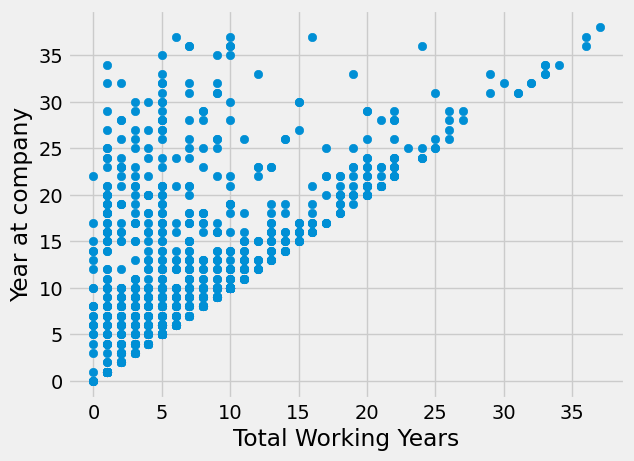

In [28]:
plt.scatter(filter_no['Years At Company'] , filter_no['Total Working Years']) 
plt.ylabel("Year at company" )
plt.xlabel("Total Working Years" )
# plt.scatter(filter_no['Total Working Years'] , filter_no['Years At Company'])



Department  overtime_yes
0         HR            12
1        R&D           197
2      Sales            80

Text(0.5, 1.0, 'Overtime by Department')

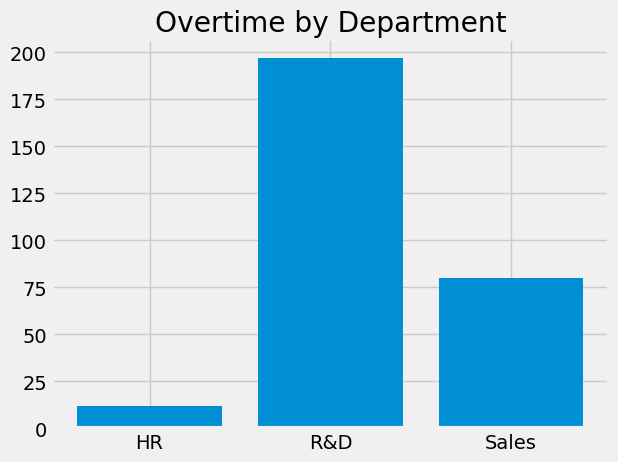

In [8]:
# unq_overtime = df_hr['Over Time'].drop_duplicates()
# unq_department = df_hr['Department'].drop_duplicates()

def count_yess(row) :
    count = 0 
    # for value in row  :
    if row == 'Yes' :
        count = 1      
    return count

df_hr['overtime_yes'] = df_hr['Over Time'].apply( lambda row : count_yess(row))
# df_hr.head()
condition = df_hr['Attrition'] == 'No'
tb_overtime = df_hr[condition].groupby('Department')['overtime_yes'].sum().reset_index()
condition = df_hr['Attrition'] == 'No'
display(tb_overtime)   

plt.style.use('fivethirtyeight')
plt.bar(tb_overtime['Department'] , tb_overtime['overtime_yes'] )   
plt.title('Overtime by Department')
# tb_overtime.loc['Attrition']
# tb_overtime = pd.DataFrame(unq_department , ) # , unq_overtime  ) 

# 

# Active Employee Distribution by Gender and Group Age
- create table for gender with age
- sum all booleas

In [9]:

filter_no.head()

# filter_no.columns ==  

Attrition    Business Travel CF_age band CF_attrition label Department  \
1        No  Travel_Frequently     45 - 54  Current Employees        R&D   
3        No  Travel_Frequently     25 - 34  Current Employees        R&D   
4        No      Travel_Rarely     25 - 34  Current Employees        R&D   
5        No  Travel_Frequently     25 - 34  Current Employees        R&D   
6        No      Travel_Rarely     Over 55  Current Employees        R&D   

  Education Field    emp no  Employee Number  Gender               Job Role  \
1   Life Sciences   STAFF-2                2    Male     Research Scientist   
3   Life Sciences   STAFF-5                5  Female     Research Scientist   
4         Medical   STAFF-7                7    Male  Laboratory Technician   
5   Life Sciences   STAFF-8                8    Male  Laboratory Technician   
6         Medical  STAFF-10               10  Female  Laboratory Technician   

   ... Relationship Satisfaction Standard Hours Stock Option Level  \
1  ...                         4             80                  1   
3  ...                         3             80                  0   
4  ...                         4             80                  1   
5  ...                         3             80                  0   
6  ...                         1             80                  3   

   Total Working Years  Work Life Balance  Years At Company  \
1                   10                  3                10   
3                    8                  3                 8   
4                    6                  3                 2   
5                    8                  2                 7   
6                   12                  2                 1   

   Years In Current Role  Years Since Last Promotion  Years With Curr Manager  \
1                      7                           1                        7   
3                      7                           3                        0   
4                      2                           2                        2   
5                      7                           3                        6   
6                      0                           0                        0   

   active  
1       1  
3       1  
4       1  
5       1  
6       1  

[5 rows x 42 columns]

Gender CF_age band  Female  Male
0          25 - 34     174   268
1          35 - 44     182   272
2          45 - 54     104   116
3          Over 55      22    36
4         Under 25      19    40

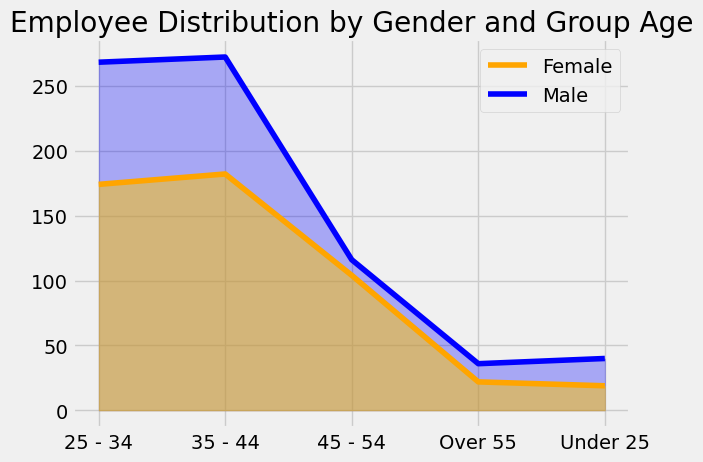

In [10]:
plt.style.use('fivethirtyeight')

tb_ages = filter_no.pivot_table( index='CF_age band',  values='active' , columns='Gender' ,  aggfunc='count').reset_index()
display(tb_ages)
    
plt.plot(tb_ages['CF_age band'] , tb_ages['Female'] , color='Orange' , label='Female')
plt.plot(tb_ages['CF_age band'] , tb_ages['Male'] , color='Blue' , label='Male') 
plt.legend() 
plt.title('Employee Distribution by Gender and Group Age')
plt.fill_between( tb_ages['CF_age band'] , tb_ages['Male'] , color='blue', alpha=0.3)
plt.fill_between( tb_ages['CF_age band'] , tb_ages['Female'] , color='#FFC300' , alpha=0.5 ) 
plt.show()
# plt.legend(title='inamoe')

Business Travel  Count
0         Non-Travel    138
1  Travel_Frequently    208
2      Travel_Rarely    887

Text(0.5, 1.0, 'Business Travel')

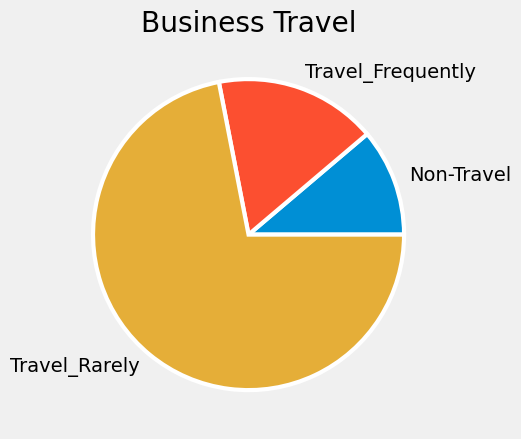

In [11]:
tb_busytravel = df_hr[condition].groupby('Business Travel')['Gender'].count().reset_index()
tb_busytravel = tb_busytravel.rename(columns={'Gender':'Count'})
display(tb_busytravel)  

plt.style.use('fivethirtyeight')
plt.pie(tb_busytravel['Count'] , labels=tb_busytravel['Business Travel'], wedgeprops={'edgecolor': 'white','linewidth':3})
plt.title('Business Travel')


Age  Daily Rate
0   18  913.500000
1   19  697.000000
2   20  857.200000
3   21  808.000000
4   22  725.909091

Text(0.5, 1.0, 'Averge Daily Rate by Age ')

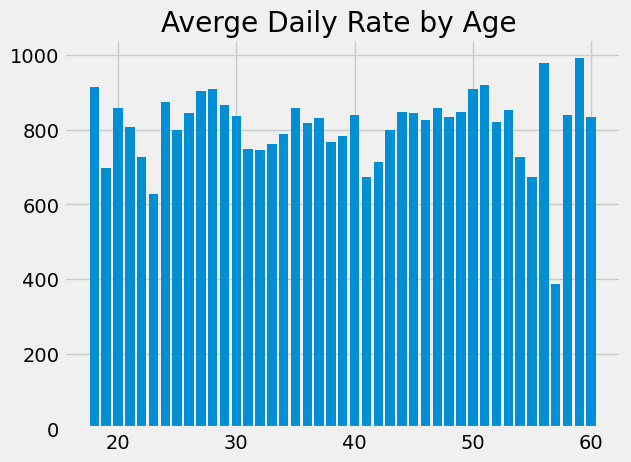

In [12]:
tb_dailyage = df_hr[condition].groupby('Age')['Daily Rate'].mean().reset_index()
display(tb_dailyage.head())

plt.bar(tb_dailyage['Age'] , tb_dailyage['Daily Rate'] ) 
plt.title('Averge Daily Rate by Age ')
# plt.ylabel('Daily Rate')

Job Role  Job Level
0  Healthcare Representative        2.0
1            Human Resources        1.0
2      Laboratory Technician        1.0
3                    Manager        4.0
4     Manufacturing Director        2.0
5          Research Director        4.0
6         Research Scientist        1.0
7            Sales Executive        2.0
8       Sales Representative        1.0

Text(0.5, 0, 'Level')

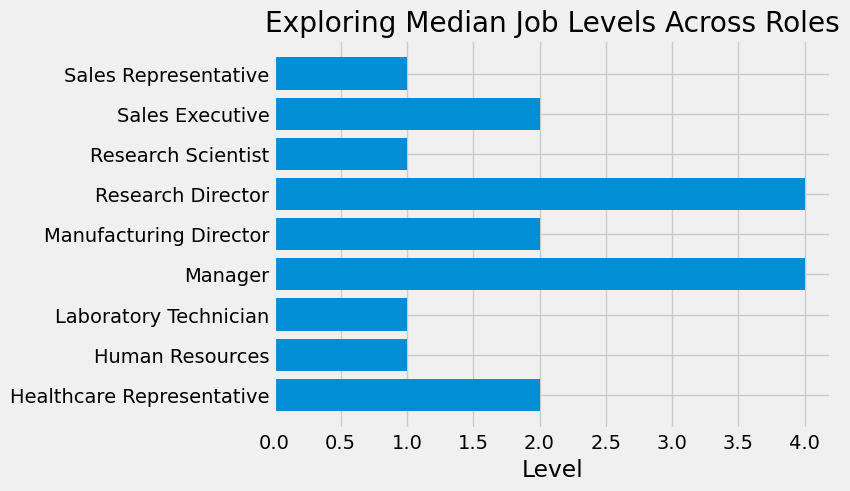

In [13]:
tb_medianlvl = df_hr.groupby('Job Role')['Job Level'].median().reset_index()
display(tb_medianlvl)

plt.barh(tb_medianlvl['Job Role'] , tb_medianlvl['Job Level']) 
plt.title('Exploring Median Job Levels Across Roles')
plt.xlabel('Level')

Gender  Environment Satisfaction    mean
0  Female                      1394  1708.5
1    Male                      2023  1708.5

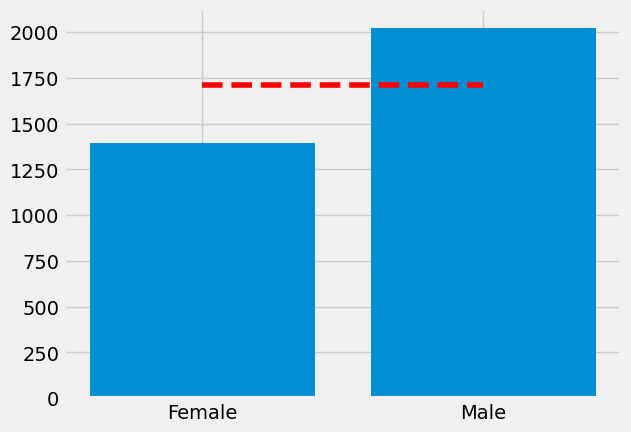

In [14]:
# tb_medianlvl = df_hr.groupby('Gender')['Enviroment Satisfaction'].median().reset_index()
tb_environment = df_hr[condition].groupby('Gender')['Environment Satisfaction'].sum().reset_index()

tb_environment['mean'] = tb_environment['Environment Satisfaction'].mean()
# display(tb_medianlvl) 

plt.bar(tb_environment['Gender'] , tb_environment['Environment Satisfaction'] ) 
plt.plot(tb_environment['Gender'] , tb_environment['mean']  , color ='r' , linestyle='--')   
# plt.barh(tb_medianlvl['Job Role'] , tb_medianlvl['Job Level']) 
display(tb_environment)
# plt.title('Exploring Median Job Levels Across Roles')
# plt.xlabel('Level')  

In [15]:
for x in df_hr :
    if "Environment Satisfaction" == x : 
        print('merons gagi')  
# len(df_hr)

merons gagi


# Scratch

In [16]:

unq_gender = df_hr['Gender'].drop_duplicates()
print(f"{unq_gender}")

def female(row):
    count = 0 
    if row == 'Female' :
        count = 1
    return count

def male(row) :
    count = 0 
    if row == 'Male' :
        count = 1 
    return count
    
# df_hr['female']
df_hr['female'] = df_hr['Gender'].apply(lambda row : female(row))
df_hr['male'] = df_hr['Gender'].apply(lambda row : male(row))
# df_hr['']

tb_ages = df_hr[condition].groupby('CF_age band')[['female' , 'male']].sum().reset_index()
tb_ages
# plt.plot(df_hr[''])

0    Female
1      Male
Name: Gender, dtype: object


CF_age band  female  male
0     25 - 34     174   268
1     35 - 44     182   272
2     45 - 54     104   116
3     Over 55      22    36
4    Under 25      19    40

Attrition  count  base      rate    rate_x  rank     xplod
0        No   1233  1470  0.838776  0.238776   2.0  0.001622
1       Yes    237  1470  0.161224 -0.438776   1.0  0.004219

Department Attrition  HR  R&D  Sales
0                 No  51  828    354
1                Yes  12  133     92

Department Attrition  HR  R&D  Sales
0                 No  51  828    354
1                Yes  12  133     92

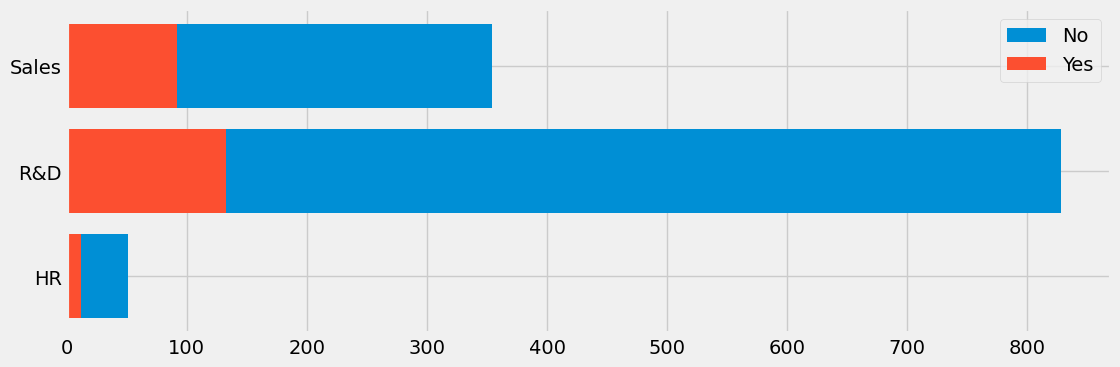

In [17]:
fig, ax = plt.subplots(1, 1 , figsize=(12,4)) 

wedgepie = {'edgecolor': 'white','linewidth':3}

font_pie = {'fontsize': 9 } 
# wedgepie  = {'edgecolor': 'white','linewidth':3}

attrition = pd.DataFrame(df_hr['Attrition'].value_counts()).reset_index()

attrition['base'] = attrition['count'].sum() 
attrition['rate'] = attrition['count'] / attrition['base']  
attrition['rate_x'] = attrition['count'] / attrition['base'] - 0.6
attrition['rank'] = attrition['count'].rank(ascending=True)
attrition['xplod'] = attrition['rank'] / attrition['count']
display(attrition )

tb_attrition = df_hr.pivot_table(index='Attrition' , values='emp no' , columns='Department' , aggfunc='count' ).reset_index()
display(tb_attrition) 

tb_attrition_rev = df_hr.pivot_table(index='Department' , values='emp no' , columns='Attrition' , aggfunc='count' ).reset_index()
display(tb_attrition) 


# ax[0].pie( attrition['count'] , labels= attrition['Attrition']  , wedgeprops=wedgepie , autopct="%1.2f%%" , explode=attrition['rate_x'] , textprops=font_pie)
# ax[0].set_title('Whole Emplooyees Attrition rate' , fontsize=10) 

# color_pie = ['#ff7f0e' , '#8540d5']
# ax[1].pie( tb_attrition['HR'] , labels=tb_attrition['Attrition']  ,  colors=color_pie, wedgeprops=wedgepie , autopct="%1.2f%%", explode=(0.1, 0) , textprops=font_pie)
# ax[1].set_title('HR Emplooyees Attrition rate' ,  fontsize=10)   
# color_pie = ['#ff7f0e' , '#8540d5']
# ax[2].pie( tb_attrition['R&D'] , labels=tb_attrition['Attrition']  ,  colors=color_pie, wedgeprops=wedgepie , autopct="%1.2f%%", explode=(0.1, 0) , textprops=font_pie)
# ax[2].set_title('R&D Emplooyees Attrition rate' ,  fontsize=10)   
# color_pie = ['#ff7f0e' , '#8540d5']
# ax[3].pie( tb_aattrition['Sales'] , labels=tb_attrition['Attrition']  ,  colors=color_pie, wedgeprops=wedgepie , autopct="%1.2f%%", explode=(0.1, 0) , textprops=font_pie)
# ax[3].set_title('Sales Emplooyees Attrition rate' ,  fontsize=10)   

plt.barh(tb_attrition_rev['Department'] , tb_attrition_rev['No'] , label='No')
plt.barh(tb_attrition_rev['Department'] , tb_attrition_rev['Yes'] , label='Yes')
ax.legend(loc='upper right') 

